# MPA-MLF, Lab 5 - Feedforward Neural Networks

These exercises are focused on dealing with neural networks. It is strongly recommended to use google collab for these pc labs. Why? Google collab offers a free GPU capacity to train machine learning models. Training NN on GPU can drastically speed up the training process. You can turn on the GPU accelerator in: Runtime -> Change runtime type -> GPU, 

## The basic terminology

### Neural Networks

Think of a neural network as a complex web of neurons (or nodes) that are interconnected to process information, similar to how the human brain works. Each neuron in this network can receive inputs, process them, and pass on the output to other neurons. The goal of a neural network is to transform the inputs (e.g., images, texts, numbers) into a desired output (e.g., identifying what's in an image, translating text, etc.).

![title](img/network.png)

### Layers

A neural network is made up of layers: the input layer (where the data enters the network), one or more hidden layers (where most of the processing happens), and the output layer (where the final prediction is made). You can think of each layer as a filter that increasingly refines the information as it passes through the network. In our case, we will discuss feedforward, fully-connected neural networks. Fully connected means that every neuron in layer *n* is connected by a weighted connection with all neurons in the layers *n+1*. Feedforward means that data are passed in one direction only, there are no reccurent connections (feedback loops) exist.

![title](img/Neural_network.png)

### Neuron

A neuron, or node, is the basic unit of a neural network. It receives input, applies a weight (significance) to that input, adds a bias (a constant value to ensure the neuron activates correctly), and then uses an activation function to determine whether and how strongly to pass its signal to the next layer. Each neuron contributes to the network's ability to make accurate predictions or decisions.|

![title](img/neuron.png)

### Neuron in the input layer

In the input layer the input neurons are composed of identity only, that means everying that comes to the input comes directly to the output

### Training

Training a neural network involves feeding it with data for which the correct output is known, allowing the network to adjust its weights and biases to minimize the difference between its predictions and the actual truths. This process is repeated numerous times with many data examples.

### Loss Function

A loss function measures how well the neural network is performing, meaning how close or far its predictions are from the actual values. The goal of training is to minimize this loss, or error, making the network's predictions as accurate as possible.

## Exercise 1 - XOR problem

During the last lecture, we saw that the single perceptron model with a step function could be used only for solving linearly-separable classification problems. Because of that, a single perceptron can not be trained to be able to behave like an XOR gate. To approximate the XOR gate using a neural network, we need to use the following structure:

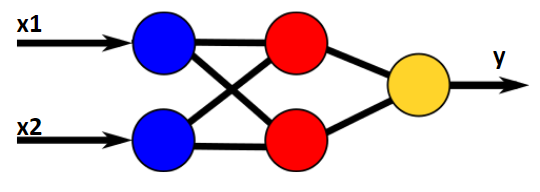

The above structure contains three layers: two neurons in the input layer (blue), two in the hidden layer and one in the output layer (yellow). The input layer represents the identity functions (the outputs are equal to the inputs)

We will use *Keras* API to build and train our neural network. Keras is an open-source neural network library written in Python. It is designed to enable fast experimentation with deep neural networks and provides a high-level API for building and training neural networks. 

### 0. First import libraries 

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### 1. prepare data

In this part, the task would be to prepade our dataset, basically it is the logic table for *XOR* function

In [3]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

In [4]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

### 2. Creating the model

To create a model of NN that is in the picture above, run the following cell

In [26]:
model = Sequential()
model.add(InputLayer(input_shape=(2,)))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
#I want to try dropout method for see  how to change  loss with epochs number
from tensorflow.keras.layers import Dropout
#model.add(Dropout(0.2))
# but after testing I saw that the plot is very different because this data set is so small and the dropout method is unusefull for this

**Sequential** is a model type used in Keras for building feedforward neural networks. It is called "sequential" because the layers are stacked sequentially on top of each other, and the output of one layer is passed as input to the next layer.

To create a sequential model, instantiate a Sequential object and then add layers to it using the **add()** method. There are many layers that Keras offers. We will use *Dense layer*

**Dense layer** represents a fully connected layer, which means that every neuron in the layer is connected to every neuron in the previous layer. In each layer, we will specify an activation function and the number of neurons that layer contains. The input layer is not defined as a dense layer, but instead of that, we will specify the *input_dim* parameter in the layer that follows the input layer. *input_dim* parameter specifies the number of neurons in the input layer

### 3. Compile the model

To compile yor model run:

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1) 
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

**keras.complile()** is used to configure the learning process before training the model. 
We need to specify 3 parameters:
- *loss*, *optimizer* and *metrics*

- as our loss function (error function/objective function), we will choose *binary_crossentropy* - loss function often used for binary classification

- *optimizer* is optimization algorithm used for optimizing weights in our training process, we will choose *stochastic gradient descent* 

- *metrics* is metric user for model evaluation


### 4. Model training

In the lecture, we talked about training the Multi-layer perceptron. The training process consists of the following steps:

1. Weight initialization
2. Forward Propagation
3. Compute Loss
4. Backpropagation
5. Update Weights
6. Repeat 2->6 until maximum epochs are reached

When training a machine learning model, the training data is usually divided into batches (parts), and the model updates its weights after processing each batch. The batch size determines how many training examples are included in each batch. 

For example, we have 10,000 training examples and a batch size of 100. In this case, the training data would be divided into 100 batches of 100 examples each. During training, the model would process each batch, calculate the loss or error, and update its weights based on the average of the errors in that batch. In other words, if we batch equal to 1. we will update the weights 10 000 times. If we have batch size == 100, we will update the weights only 100 times 

To train your model, run the following line of the code:

In [28]:
history = model.fit(X, y, epochs=3000, batch_size=1, verbose=0) # what is the verbose parameter? or epochs? or batch_size?

In [31]:
#Additional
#I want to call EarlyStopping from callback because if after the 50 epochs model is good, callback will be stopped fit function.
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=50, restore_best_weights=True)
history = model.fit(X, y, epochs=3000, batch_size=1, verbose=0, callbacks=[early_stopping])
#print(history.history['loss'])

the method **.fit()**, is used to train the model. We can see that it takes several input parameters:
 - *X* - input data
 - *y* - label for the input data
 - *epochs* number of training epochs (iterations)
 - *batch_size* - number of samples in each batch
 - *verbose* - set verbose parameter to see the progress of loss and metrics during the training epochs

These are not the only parameters the .fit() method can take. Check official documentation: https://keras.io/api/models/model_training_apis/

We will set the output of our .fit() function to variable *history*, where the loss and other metrics defined above in the .compile() function during the training are saved.

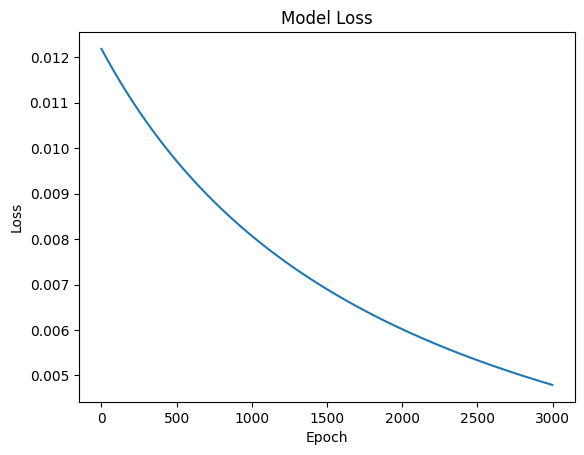

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


### 5. Model evaluation

Out training process is finished. To evaluate the performance of our model on test data, tun the following cell of the code:

In [39]:
loss, accuracy = model.evaluate(X, y, verbose=0)
print(f"Test Loss: {loss :.4f}")
print(f"Test Accuracy: {accuracy:.4f} and if we show test accuracy with percent : {accuracy * 100:.2f}%" )

Test Loss: 0.0048
Test Accuracy: 1.0000 and if we show test accuracy with percent : 100.00%


### 6. Model predictions

In [40]:
for id_x, data_sample in enumerate(X):
    # I want to reshape our data because we need to push data_sample (1,2) form into the predict function.
  data_sample = np.array(data_sample).reshape(1, -1)
  prediction = model.predict([data_sample])
  print(f"Data sample is {data_sample}, prediction from model {prediction}, ground_truth {y[id_x]}")
    # Actually we get some warning after the predict becasue we need to push directly numpy array format.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Data sample is [[0 0]], prediction from model [[0.00560627]], ground_truth 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Data sample is [[0 1]], prediction from model [[0.9957382]], ground_truth 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Data sample is [[1 0]], prediction from model [[0.99566793]], ground_truth 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Data sample is [[1 1]], prediction from model [[0.00491395]], ground_truth 0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_22
Received: inputs=('Tensor(shape=(1, 2))',)
  warnings.warn(msg)


### 7. Display loss function during the training process and acuracy

Text(0, 0.5, 'loss')

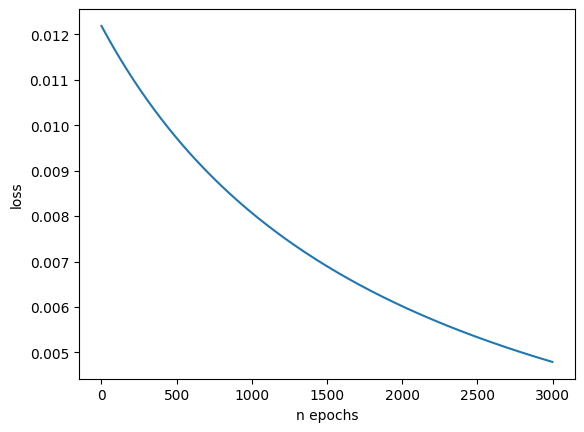

In [42]:
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('n epochs')
plt.ylabel('loss')

### TASK:

In this part of the exercise, the task would be to play around with the code above to see the influence of hyperparameters.

As we know from the lecture, neural networks contain two types of parameters:
  1. **Learnable parameters** - *weights* and *biases*. these parameters are adjusted in the training process.  
  2. **Non-learnable parameters (hyperparameters)** - learning_rate, number_of_neurons, number_of_layers, number_of_epochs, type of activation functions in the neurons.., basically any user-defined setting is considered to be hyperparameter


Change the following parameters: 
- number of epochs
- learning_rate
- activation functions in layers, 
- batch_size,
- verbose,
- number of neurons in the hidden layer

Moreover, see the influence on the training process and results.

**Note: Every time we change some hyper-parameters, do not forget to compile the model, to initialize the learnable parameters again**

## Exercise 2 - Congressional Voting Data

In the attached dataset, results from congressional voting can be found. Your task is to train a model that can recognize that the politician is *republican* or *democrat* based on voting results. We would follow the general machine learning steps that were described in the lecture.

In [153]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

### 1. Loading dataset

**First mount your google drive to google colab file.**

In [ ]:
#load the dataset
pd_data = pd.read_csv('voting_complete.csv')


### 2. Data examination

The task would be to examine the dataset. Check:

1. Is it a classification of regression task?
2. How many data samples do we have?
3. How many features do we have?  
4. What data types do we have in our dataset?
5. Are there any missing values?
6. How many labels do we have? 


In [ ]:
#drop the first column because it is unnecessary
pd_data = pd_data.drop(columns=["Unnamed: 0"], errors="ignore")

In [ ]:
# Class Name digitization: democrat -> 0, republican -> 1
pd_data["Class Name"] = pd_data["Class Name"].replace({"democrat": 0, "republican": 1}).infer_objects(copy=False)
# ? -> NaN
pd_data = pd_data.replace("?", np.nan)


### 3. Data preprocessing

When you preprocess your traing data, do not forget that you need to apply the same preprocessing also for your test set. For example: If you decide to delete some columns in your train set, you have to delete the same columns in your test set. 

Possible preprocessing steps (try several and see the influence of your preprocessing on your results)
 - Replace missing values with any data imputation technique ( for example, the most occurring value in the column), then perform one-hot encoding or label encoding of your data
 - Consider the missing value to be the third category 'unknown' and then perform one-hot encoding or label encoding

The target value also has to be encoded. This can be done by one-hot encoding or label encoding.

In [ ]:
missing_indices = pd_data[pd_data.isnull().any(axis=1)].index
pd_dropped = pd_data.drop(index=missing_indices)
#After dropping the missing values, we need to replace the n and y values with 0 and 1.
columns_to_convert = [col for col in pd_dropped.columns if col != "Class Name"]
pd_dropped[columns_to_convert] = pd_dropped[columns_to_convert].replace({'n': 0, 'y': 1})
print("Shape of Cleaned Data:", pd_dropped.shape)

Shape of Cleaned Data: (232, 17)


/var/folders/tr/c0y5r0zn1tn_8yr22w5_yffh0000gn/T/ipykernel_13610/1625211289.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pd_dropped[columns_to_convert] = pd_dropped[columns_to_convert].replace({'n': 0, 'y': 1})


In [ ]:
pd_filled = pd_data.copy()
for column in pd_filled.columns:
    if column != "Class Name":
     mode_val = pd_filled[column].dropna().mode()[0]
     pd_filled[column].fillna(mode_val, inplace=True)

#After filling the missing values, we need to replace the n and y values with 0 and 1.
columns_to_convert = [col for col in pd_filled.columns if col != "Class Name"]
pd_filled[columns_to_convert] = pd_filled[columns_to_convert].replace({'n': 0, 'y': 1})
print("Shape of Filled Data:", pd_filled.shape)


Shape of Filled Data: (435, 17)


/var/folders/tr/c0y5r0zn1tn_8yr22w5_yffh0000gn/T/ipykernel_13610/3764340619.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pd_filled[column].fillna(mode_val, inplace=True)
/var/folders/tr/c0y5r0zn1tn_8yr22w5_yffh0000gn/T/ipykernel_13610/3764340619.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

### 4. Train/Test Split

Fistlty we need to split our dataset into train and test. We will use 80% of dataset as our trainset and 20% od dataset as our testset. You can use functions included in *keras*, *scikit-learn*, or you can write your own:

In [277]:
X = pd_dropped.drop(columns=["Class Name"])
y = pd_dropped["Class Name"]

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X1_train.shape, y1_train.shape)
print("Test set:", X1_test.shape, y1_test.shape)

Training set: (185, 16) (185,)
Test set: (47, 16) (47,)


In [278]:
X = pd_filled.drop(columns=["Class Name"])
y = pd_filled["Class Name"]

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X2_train.shape, y2_train.shape)
print("Test set:", X2_test.shape, y2_test.shape)

Training set: (348, 16) (348,)
Test set: (87, 16) (87,)


In [279]:
# I want to check the data types of the datasets because we need to convert them to numpy array
print(pd_dropped.dtypes)
print(pd_filled.dtypes)

Class Name                                int64
handicapped-infants                       int64
water-project-cost-sharing                int64
adoption-of-the-budget-resolution         int64
physician-fee-freeze                      int64
el-salvador-aid                           int64
religious-groups-in-schools               int64
anti-satellite-test-ban                   int64
aid-to-nicaraguan-contras                 int64
mx-missile                                int64
immigration                               int64
synfuels-corporation-cutback              int64
education-spending                        int64
superfund-right-to-sue                    int64
crime                                     int64
duty-free-exports                         int64
export-administration-act-south-africa    int64
dtype: object
Class Name                                int64
handicapped-infants                       int64
water-project-cost-sharing                int64
adoption-of-the-budget-res

### 5. Creating the model

1. Create your model using alteast one hidden layer. 

*hint: do not create too complex models, this is a very simple task, so it would be enought to use just few neurons in the hidden layers*

In [354]:
def build_model_1(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
def build_model_2(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
def train_model(model, X_train, y_train, epochs=300, batch_size=16, validation_split=0.2):
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        validation_split=validation_split,
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stop],
        verbose=0
    )
    return history

In [399]:
scaler = StandardScaler()  # StandardScaler is used to standardize features by removing the mean and scaling to unit variance.
X1_train_scaled = scaler.fit_transform(X1_train)  # Fit the scaler on the training data and transform it to scale the features.
X1_test_scaled = scaler.transform(X1_test)  # Use the same scaler to transform the test data to ensure consistency.
X2_train_scaled = scaler.fit_transform(X2_train)  # Fit and transform the second training dataset.
X2_test_scaled = scaler.transform(X2_test)  # Transform the second test dataset using the same scaler.

In [398]:
# Build the model using the dropped dataset (pd_dropped)
# I am using the build_model_1 function to create a simple model without dropout layers.
# This will help me understand how a basic model performs on the dropped dataset.
model1_1 = build_model_1(input_dim=X1_train_scaled.shape[1])

# Train the model with 100 epochs and a batch size of 16.
# I chose these values to balance training time and model performance.
history1_1 = train_model(model1_1, X1_train_scaled, y1_train, epochs=100, batch_size=16)

# Print the final loss and accuracy after training. 
# This helps me understand how well the model performed during training.
print("Final epoch loss:", history1_1.history['loss'][-1])
print("Final epoch accuracy:", history1_1.history['accuracy'][-1])

# Evaluate the model on the test set to check its performance on unseen data.
# This step is crucial to see if the model generalizes well.
loss, accuracy = model1_1.evaluate(X1_test_scaled, y1_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# I see that if the final epoch accuracy is 1, it may be overfitting.
# So, I want to try the dropout method in build_model_1_N.

# I see that if the final eopch accuracy is 1 , it may be overfitting. So, I want to try the dropout method in build_model_1_N.

Final epoch loss: 0.005490020848810673
Final epoch accuracy: 1.0
Test Loss: 0.0887, Test Accuracy: 0.9362


In [397]:
# Build the model using the dropped dataset (pd_dropped)
# I am using the build_model_2 function to create a model with dropout and batch normalization layers.
# This should help reduce overfitting and improve generalization.
model2_1 = build_model_2(input_dim=X1_train_scaled.shape[1])

# Train the model with 100 epochs and a batch size of 16.
# I am using the train_model function, which includes early stopping to prevent overfitting.
history2_1 = train_model(model2_1, X1_train_scaled, y1_train, epochs=100, batch_size=16)

# Print the final loss and accuracy after training.
# This helps me understand how well the model performed during training.
print("Final epoch loss:", history2_1.history['loss'][-1])
print("Final epoch accuracy:", history2_1.history['accuracy'][-1])

# Evaluate the model on the test set to check its performance on unseen data.
# This step is crucial to see if the model generalizes well.
loss, accuracy = model2_1.evaluate(X1_test_scaled, y1_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Final epoch loss: 0.06219128519296646
Final epoch accuracy: 0.9797297120094299
Test Loss: 0.1234, Test Accuracy: 0.9787


In [396]:
# Build the model using the filled dataset (pd_filled)
# I am using the build_model_1 function to create a simple model without dropout or batch normalization layers.
# This will help me understand how a basic model performs on the filled dataset.
model1_2 = build_model_1(input_dim=X2_train_scaled.shape[1])

# Train the model with 100 epochs and a batch size of 16.
# I chose these values to balance training time and model performance.
history1_2 = train_model(model1_2, X2_train_scaled, y2_train, epochs=100, batch_size=16)

# Print the final loss and accuracy after training. 
# This helps me understand how well the model performed during training.
print("Final epoch loss:", history1_2.history['loss'][-1])
print("Final epoch accuracy:", history1_2.history['accuracy'][-1])

# Evaluate the model on the test set to check its performance on unseen data.
# This step is crucial to see if the model generalizes well.
loss, accuracy = model1_2.evaluate(X2_test_scaled, y2_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Final epoch loss: 0.035811897367239
Final epoch accuracy: 0.9892086386680603
Test Loss: 0.1559, Test Accuracy: 0.9425


In [395]:
# Build the model using the filled dataset (pd_filled)
# I am using the build_model_2 function to create a model with dropout and batch normalization layers.
# This should help reduce overfitting and improve generalization.
model2_2 = build_model_2(input_dim=X2_train_scaled.shape[1])

# Train the model with 100 epochs and a batch size of 16.
# I am using the train_model function, which includes early stopping to prevent overfitting.
history2_2 = train_model(model2_2, X2_train_scaled, y2_train, epochs=100, batch_size=16)

# Print the final loss and accuracy after training.
# This helps me understand how well the model performed during training.
print("Final epoch loss:", history2_2.history['loss'][-1])
print("Final epoch accuracy:", history2_2.history['accuracy'][-1])

# Evaluate the model on the test set to check its performance on unseen data.
# This step is crucial to see if the model generalizes well.
loss, accuracy = model2_2.evaluate(X2_test_scaled, y2_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")



Final epoch loss: 0.11682575196027756
Final epoch accuracy: 0.9532374143600464
Test Loss: 0.1747, Test Accuracy: 0.9655


2. Check what *model.summary()* does

In [360]:
print("Model 1 Summary with dropped data:")
model1_1.summary()

Model 1 Summary with dropped data:


Model: "sequential_85"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_255 (Dense)               │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_256 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_257 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,605 (37.52 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,404 (25.02 KB)

In [361]:
print("Model 2 Summary with dropped data:")
model2_1.summary()

Model 2 Summary with dropped data:


Model: "sequential_86"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_258 (Dense)               │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_259 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_260 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,965 (66.27 KB)

 Trainable params: 5,569 (21.75 KB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 11,140 (43.52 KB)

In [362]:
print("Model 1 Summary with filled data:")
model1_2.summary()

Model 1 Summary with filled data:


Model: "sequential_87"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_261 (Dense)               │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_262 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_263 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,605 (37.52 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,404 (25.02 KB)

In [363]:
print("Model 2 Summary with dropped data:")
model2_2.summary()

Model 2 Summary with dropped data:


Model: "sequential_88"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_264 (Dense)               │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_265 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_266 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,965 (66.27 KB)

 Trainable params: 5,569 (21.75 KB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 11,140 (43.52 KB)

3. Compile the model, choose a suitable loss function, choose gradient to descend optimizer and specify the learning rate, and choose accuracy as our metric

In [391]:
# I want to try different model with different optimizer and learning rate for see the difference between them.
def build_model_1_N(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model
# I apply same model with different optimizer and learning rate for buid_model_2_N
def build_model_2_N(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model1_1_N = build_model_1_N(input_dim=X1_train_scaled.shape[1])
history1_1_N = train_model(model1_1_N, X1_train_scaled, y1_train, epochs=100, batch_size=16)
print("Final epoch loss:", history1_1_N.history['loss'][-1])
print("Final epoch accuracy:", history1_1_N.history['accuracy'][-1])
loss, accuracy = model1_1_N.evaluate(X1_test_scaled, y1_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
# After using dropout method, I see that the final epoch accuracy is not 1, so it may not be overfitting.

Final epoch loss: 0.032007403671741486
Final epoch accuracy: 0.9864864945411682
Test Loss: 0.0567, Test Accuracy: 0.9787


In [388]:
# Build the model using the dropped dataset (pd_dropped) with dropout and batch normalization layers.
# I am using the build_model_2_N function to create a model with dropout and batch normalization layers.
# This should help reduce overfitting and improve generalization.
model2_1_N = build_model_2_N(input_dim=X1_train_scaled.shape[1])

# Train the model with 100 epochs and a batch size of 16.
# I am using the train_model function, which includes early stopping to prevent overfitting.
history2_1_N = train_model(model2_1_N, X1_train_scaled, y1_train, epochs=100, batch_size=16)

# Print the final loss and accuracy after training.
# This helps me understand how well the model performed during training.
print("Final epoch loss:", history2_1_N.history['loss'][-1])
print("Final epoch accuracy:", history2_1_N.history['accuracy'][-1])

# Evaluate the model on the test set to check its performance on unseen data.
# This step is crucial to see if the model generalizes well.
loss, accuracy = model2_1_N.evaluate(X1_test_scaled, y1_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Final epoch loss: 0.05405694246292114
Final epoch accuracy: 0.9932432174682617
Test Loss: 0.1127, Test Accuracy: 0.9787


In [387]:
# Build the model using the filled dataset (pd_filled) with dropout layers to prevent overfitting.
model1_2_N = build_model_1_N(input_dim=X2_train_scaled.shape[1])

# Train the model with 100 epochs and a batch size of 16. 
# I chose these values to balance training time and model performance.
history1_2_N = train_model(model1_2_N, X2_train_scaled, y2_train, epochs=100, batch_size=16)

# Print the final loss and accuracy after training. 
# This helps me understand how well the model performed during training.
print("Final epoch loss:", history1_2_N.history['loss'][-1])
print("Final epoch accuracy:", history1_2_N.history['accuracy'][-1])

# Evaluate the model on the test set to check its performance on unseen data.
# This step is crucial to see if the model generalizes well.
loss, accuracy = model1_2_N.evaluate(X2_test_scaled, y2_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Final epoch loss: 0.06396577507257462
Final epoch accuracy: 0.9676259160041809
Test Loss: 0.1812, Test Accuracy: 0.9540


In [386]:
# Build and train the model using the filled dataset (pd_filled)
# I am using the build_model_2_N function to create a model with dropout and batch normalization layers.
# This should help reduce overfitting and improve generalization.
model2_2_N = build_model_2_N(input_dim=X2_train_scaled.shape[1])

# Train the model with 100 epochs and a batch size of 16.
# I am using the train_model function, which includes early stopping to prevent overfitting.
history2_2_N = train_model(model2_2_N, X2_train_scaled, y2_train, epochs=100, batch_size=16)

# Print the final loss and accuracy after training.
# This helps me understand how well the model performed during training.
print("Final epoch loss:", history2_2_N.history['loss'][-1])
print("Final epoch accuracy:", history2_2_N.history['accuracy'][-1])

# Evaluate the model on the test set to check its performance on unseen data.
# This step is crucial to see if the model generalizes well.
loss, accuracy = model2_2_N.evaluate(X2_test_scaled, y2_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Final epoch loss: 0.12302146106958389
Final epoch accuracy: 0.9568345546722412
Test Loss: 0.1169, Test Accuracy: 0.9540


### 7. Model Evaluation 



1. First, apply the same preprocessing you did to train set to test set also

In [385]:
# First step, I build a function for plotting the history of the model.
# This function will help visualize the training and validation loss and accuracy over epochs.
# It will make it easier to understand how the model is learning and whether it is overfitting or underfitting.
def plot_history(history, title="Model History"):
    plt.figure(figsize=(12, 4))
    
    # Plotting the training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')  # Training loss
    plt.plot(history.history['val_loss'], label='Validation Loss')  # Validation loss
    plt.xlabel('Epochs')  # Label for x-axis
    plt.ylabel('Loss')  # Label for y-axis
    plt.title(title + " - Loss")  # Title for the loss plot
    plt.legend()  # Add legend to differentiate between train and validation loss

    # Plotting the training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')  # Training accuracy
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Validation accuracy
    plt.xlabel('Epochs')  # Label for x-axis
    plt.ylabel('Accuracy')  # Label for y-axis
    plt.title(title + " - Accuracy")  # Title for the accuracy plot
    plt.legend()  # Add legend to differentiate between train and validation accuracy
    
    # Adjust layout to prevent overlapping of plots
    plt.tight_layout()
    plt.show()  # Display the plots

In [380]:
# Now, I want to choice pd_filled data for the model because it is more accurate than pd_dropped data but in the codes above, build_model_1 and build_model_2 were applied for both dropped and filled data. Differences in accuracy and loss were also seen. Finally, let's select the pd_filled data, draw graphs and finish.
# I apply the model1_1 and model1_2 for pd_filled data.
# Build the model using the filled dataset (pd_filled) as it is more accurate than the dropped dataset (pd_dropped)
model1_2 = build_model_1(input_dim=X2_train_scaled.shape[1])  # Initialize the model with the input dimension of the filled dataset
history1_2 = train_model(model1_2, X2_train_scaled, y2_train, epochs=300, batch_size=16)  # Train the model with 300 epochs and batch size of 16

# Print the final loss and accuracy after training
print("Final epoch loss:", history1_2.history['loss'][-1])  # Display the loss value of the last epoch
print("Final epoch accuracy:", history1_2.history['accuracy'][-1])  # Display the accuracy value of the last epoch

# Evaluate the model on the test set
loss, accuracy = model1_2.evaluate(X2_test_scaled, y2_test, verbose=0)  # Evaluate the model using the test data
print(f"Test Loss: {loss:.4f}")  # Print the test loss with 4 decimal precision
print(f"Test Accuracy: {accuracy:.4f}")  # Print the test accuracy with 4 decimal precision

Final epoch loss: 0.025900252163410187
Final epoch accuracy: 0.9928057789802551
Test Loss: 0.1496
Test Accuracy: 0.9425


In [ ]:
# Build and train the model using the filled dataset
model2_2 = build_model_2(input_dim=X2_train_scaled.shape[1])  # Create the model with the specified input dimension
history2_2 = train_model(model2_2, X2_train_scaled, y2_train, epochs=300, batch_size=16)  # Train the model with 300 epochs and batch size of 16

# Print the final loss and accuracy after training
print("Final epoch loss:", history2_2.history['loss'][-1])  # Display the loss value of the last epoch
print("Final epoch accuracy:", history2_2.history['accuracy'][-1])  # Display the accuracy value of the last epoch

# Evaluate the model on the test dataset
loss, accuracy = model2_2.evaluate(X2_test_scaled, y2_test, verbose=0)  # Evaluate the model on the test set
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")  # Print the test loss and accuracy

Final epoch loss: 0.07040265202522278
Final epoch accuracy: 0.9784172773361206
Test Loss: 0.1760, Test Accuracy: 0.9425


In [384]:
# Build the model using the filled dataset (pd_filled) with dropout for regularization
model1_2_N = build_model_1_N(input_dim=X2_train_scaled.shape[1])  # Initialize the model with the input dimension of the filled dataset
history1_2_N = train_model(model1_2_N, X2_train_scaled, y2_train, epochs=300, batch_size=16)  # Train the model with 300 epochs and batch size of 16

# Print the final loss and accuracy after training
print("Final epoch loss:", history1_2_N.history['loss'][-1])  # Display the loss value of the last epoch to understand how well the model performed
print("Final epoch accuracy:", history1_2_N.history['accuracy'][-1])  # Display the accuracy value of the last epoch to evaluate the model's performance

# Evaluate the model on the test dataset
loss, accuracy = model1_2.evaluate(X2_test_scaled, y2_test, verbose=0)  # Evaluate the model on the test set to check its generalization ability
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")  # Print the test loss and accuracy to compare with training results

Final epoch loss: 0.05932044982910156
Final epoch accuracy: 0.9748201370239258
Test Loss: 0.1496, Test Accuracy: 0.9425


In [382]:
# Build the model using the filled dataset (pd_filled) with dropout for regularization
# Initialize the model with the input dimension of the filled dataset
model2_2_N = build_model_2_N(input_dim=X2_train_scaled.shape[1])

# Train the model with 300 epochs and batch size of 16
# The train_model function handles the training process and uses early stopping to prevent overfitting
history2_2_N = train_model(model2_2_N, X2_train_scaled, y2_train, epochs=300, batch_size=16)

# Print the final loss and accuracy after training
# This helps us understand how well the model performed during the last epoch
print("Final epoch loss:", history2_2_N.history['loss'][-1])  # Display the loss value of the last epoch
print("Final epoch accuracy:", history2_2_N.history['accuracy'][-1])  # Display the accuracy value of the last epoch

# Evaluate the model on the test dataset
# This step is crucial to check how well the model generalizes to unseen data
loss, accuracy = model2_2.evaluate(X2_test_scaled, y2_test, verbose=0)

# Print the test loss and accuracy
# These metrics indicate the model's performance on the test set
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Final epoch loss: 0.08016451448202133
Final epoch accuracy: 0.9748201370239258
Test Loss: 0.1760, Test Accuracy: 0.9425


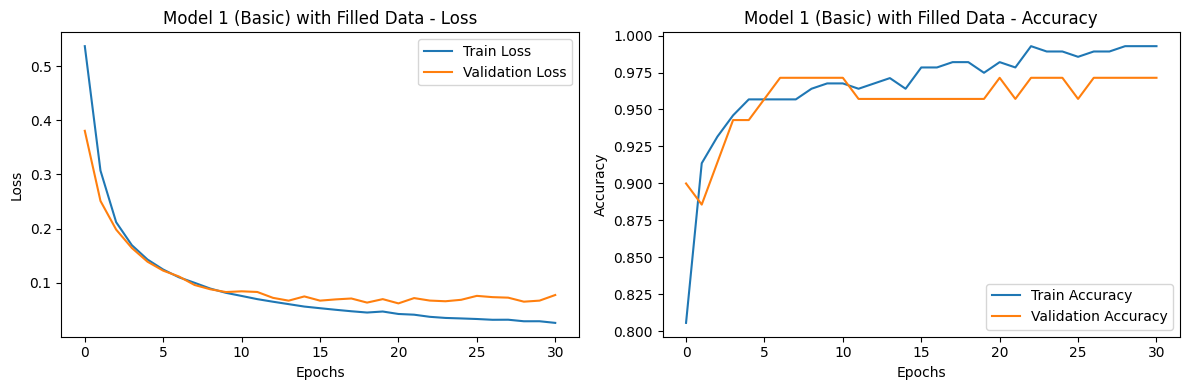

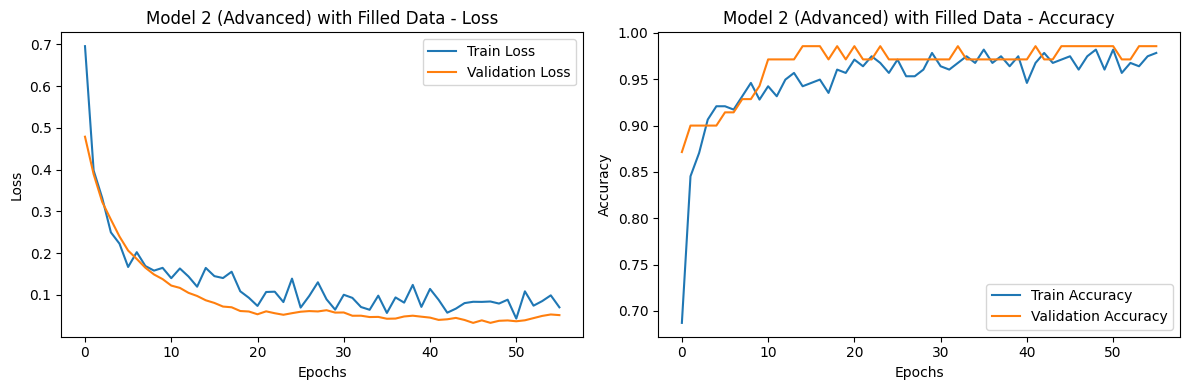

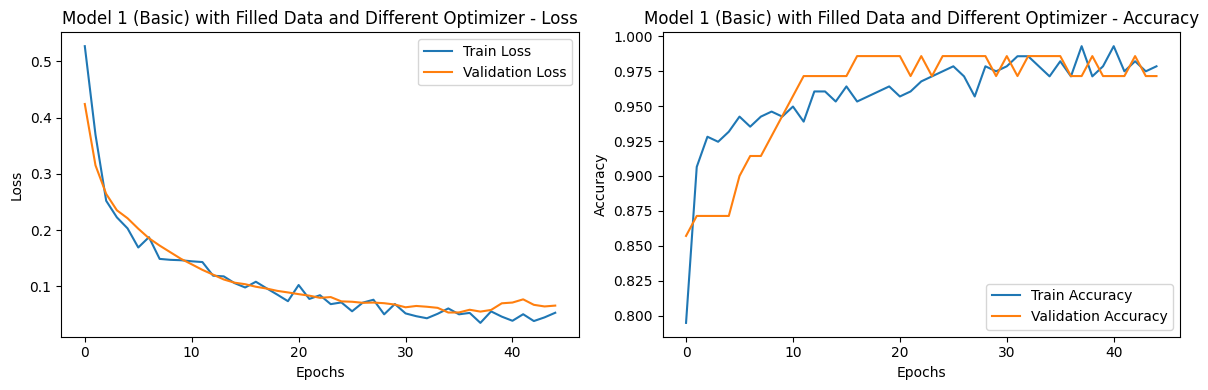

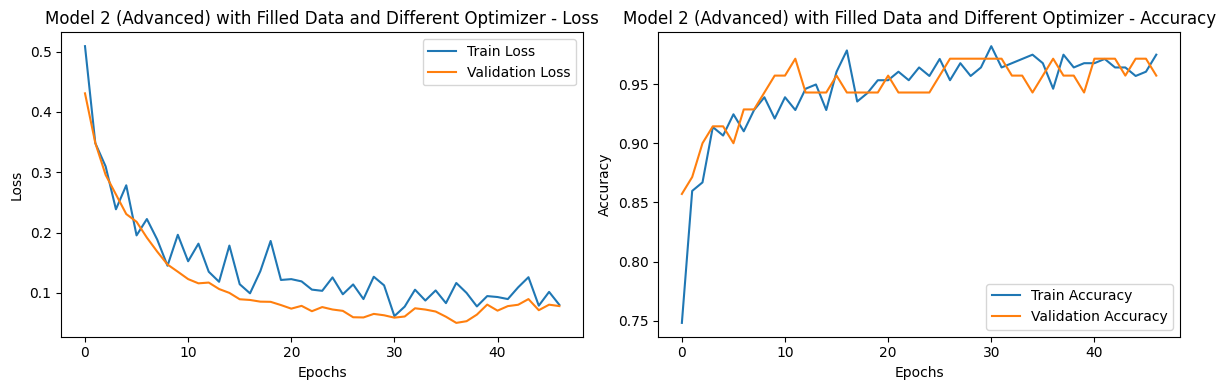

In [383]:
# Plot the training history for Model 1 (Basic) with Filled Data
# This will help us visualize how the loss and accuracy evolved during training
plot_history(history1_2, title="Model 1 (Basic) with Filled Data")

# Plot the training history for Model 2 (Advanced) with Filled Data
# This model includes additional layers and techniques like batch normalization and dropout
plot_history(history2_2, title="Model 2 (Advanced) with Filled Data")

# Plot the training history for Model 1 (Basic) with Filled Data and a Different Optimizer
# Here, we used a different optimizer and learning rate to see how it affects the training process
plot_history(history1_2_N, title="Model 1 (Basic) with Filled Data and Different Optimizer")

# Plot the training history for Model 2 (Advanced) with Filled Data and a Different Optimizer
# This model combines advanced techniques with a different optimizer to improve performance
plot_history(history2_2_N, title="Model 2 (Advanced) with Filled Data and Different Optimizer")